# Preprocessing Pipeline for Patient Readmission Risk Prediction

This notebook demonstrates a preprocessing pipeline for the hospital readmission risk prediction project using the provided CSV data. The pipeline includes data loading, cleaning, transformation, feature engineering, and model training steps.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the main dataset
data = pd.read_csv('diabetic_data.csv')
# Load the mapping file (if needed for feature engineering)
ids_mapping = pd.read_csv('IDS_mapping.csv')

data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Step 1: Data Cleaning
- Handle missing values
- Remove duplicates
- Standardize formats if necessary

In [2]:
# Check for missing values
missing_summary = data.isin(['?', 'NA', 'NaN', None]).sum()
print('Missing values per column:')
print(missing_summary[missing_summary > 0])

# Replace '?' with np.nan
data.replace('?', np.nan, inplace=True)

# Drop columns with too many missing values (e.g., >50%)
threshold = 0.5
cols_to_drop = [col for col in data.columns if data[col].isna().mean() > threshold]
data.drop(columns=cols_to_drop, inplace=True)

# Drop duplicate rows
data.drop_duplicates(inplace=True)

data.info()

Missing values per column:
race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2                 358
diag_3                1423
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                61510 non-null   object


## Step 2: Data Transformation
- Encode categorical variables
- Normalize/standardize numerical features
- Aggregate or transform time-series data if present

In [3]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Example: One-hot encode categorical variables (excluding target and IDs)
categorical_cols = [col for col in categorical_cols if col not in ['readmitted', 'patient_nbr', 'encounter_id']]
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,-1.587330,-1.191545,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,...,False,True,False,False,False,False,False,False,True,False
1,-1.608075,0.033564,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,...,True,True,False,False,False,False,False,False,False,True
2,-1.608901,0.819654,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,...,False,True,False,False,False,False,False,False,True,True
3,-1.604653,0.726480,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,...,True,True,False,False,False,False,False,False,False,True
4,-1.609366,-0.305227,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,...,False,True,False,False,False,False,False,False,False,True


## Step 3: Feature Engineering
- Create features such as number of hospitalizations, length of stay, comorbidity indices, etc.
- Extract insights from clinical notes if available (NLP)

In [4]:
# Example feature: Number of inpatient visits
if 'number_inpatient' in data.columns:
    data['high_inpatient_visits'] = (data['number_inpatient'] > 2).astype(int)

# Example feature: Length of stay (if available)
if 'time_in_hospital' in data.columns:
    data['long_stay'] = (data['time_in_hospital'] > data['time_in_hospital'].median()).astype(int)

# Example: Comorbidity index (sum of certain diagnoses)
comorbidity_cols = [col for col in data.columns if 'diag_' in col]
if comorbidity_cols:
    data['comorbidity_index'] = data[comorbidity_cols].notnull().sum(axis=1)

data.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,high_inpatient_visits,long_stay,comorbidity_index
0,-1.587330,-1.191545,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,...,False,False,False,False,False,True,False,0,0,2250
1,-1.608075,0.033564,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,-0.291461,...,False,False,False,False,False,False,True,0,0,2250
2,-1.608901,0.819654,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,1.286748,...,False,False,False,False,False,True,True,0,0,2250
3,-1.604653,0.726480,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,...,False,False,False,False,False,False,True,0,0,2250
4,-1.609366,-0.305227,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,...,False,False,False,False,False,False,True,0,0,2250


## Step 4: Data Splitting
- Split data into training, validation, and test sets
- Ensure temporal separation if possible

In [5]:
# Example: Split data (assuming 'readmitted' is the target)
X = data.drop(['readmitted', 'patient_nbr', 'encounter_id'], axis=1, errors='ignore')
y = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)  # Binary: 1 if readmitted within 30 days

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

Train shape: (81412, 2416)
Test shape: (20354, 2416)


In [6]:
# Clean column names to remove problematic characters for XGBoost
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.replace('[', '_', regex=False)
        .str.replace(']', '_', regex=False)
        .str.replace('<', 'lt_', regex=False)
        .str.replace('>', 'gt_', regex=False)
        .str.replace(' ', '_')
        .str.replace('=', '_')
        .str.replace(',', '_')
        .str.replace('(', '_')
        .str.replace(')', '_')
        .str.replace('__', '_')
    )
    return df

X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

## Step 5: Model Training and Evaluation (XGBoost)
We will use XGBoost, a gradient boosting model, to train and evaluate our readmission risk predictor.

In [7]:
# If running in a new environment, uncomment the next line to install xgboost
# !pip install xgboost

import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

c:\Users\Me Soft\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:07:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.52      0.02      0.04      2271

    accuracy                           0.89     20354
   macro avg       0.71      0.51      0.49     20354
weighted avg       0.85      0.89      0.84     20354

Confusion Matrix:
[[18036    47]
 [ 2220    51]]
ROC AUC Score: 0.6797331586118153


## Step 6: Confusion Matrix, Precision, and Recall
We compute the confusion matrix, precision, and recall to evaluate the model's performance on the test set.
- **Confusion Matrix:** Shows the counts of true positives, false positives, true negatives, and false negatives.
- **Precision:** Proportion of predicted positives that are actually positive.
- **Recall:** Proportion of actual positives that are correctly identified.

In [8]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Confusion Matrix:
[[18036    47]
 [ 2220    51]]
Precision: 0.52
Recall: 0.02


## Step 7: Feature Importance Visualization
Let's visualize the most important features in the model.

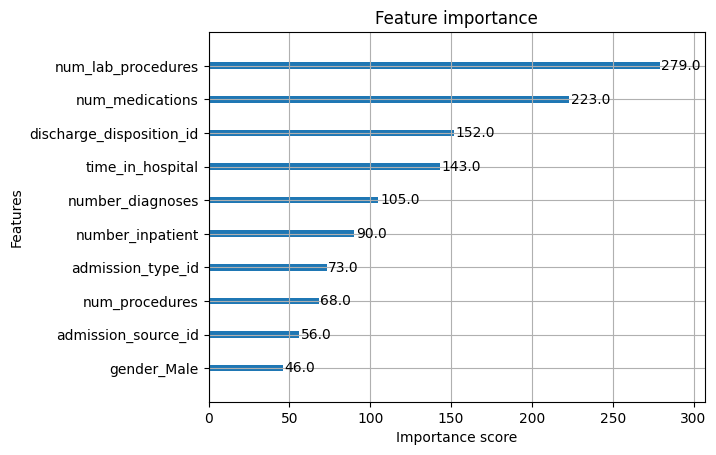

In [9]:
import matplotlib.pyplot as plt
xgb.plot_importance(model, max_num_features=10)
plt.show()

## Step 8: Model Optimization - Addressing Overfitting
We implement early stopping with cross-validation to prevent overfitting and improve model generalization.

**Why Early Stopping?**
- Prevents the model from memorizing training data
- Improves performance on unseen data
- Critical for healthcare applications where reliability is paramount
- Automatically finds the optimal number of training rounds

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt

# Create a validation set for early stopping
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Configure optimized XGBoost model with early stopping
optimized_model = xgb.XGBClassifier(
    n_estimators=1000,  # Set high number, early stopping will prevent overfitting
    learning_rate=0.1,
    max_depth=6,
    early_stopping_rounds=50,  # Stop if no improvement for 50 rounds
    eval_metric='logloss',
    random_state=42
)

# Train with early stopping
optimized_model.fit(
    X_train_final, 
    y_train_final,
    eval_set=[(X_val, y_val)],
    verbose=True
)

print(f"Best iteration: {optimized_model.best_iteration}")
print(f"Best score: {optimized_model.best_score}")

[0]	validation_0-logloss:0.34609
[1]	validation_0-logloss:0.34317
[2]	validation_0-logloss:0.34110
[3]	validation_0-logloss:0.33914
[4]	validation_0-logloss:0.33780
[5]	validation_0-logloss:0.33672
[6]	validation_0-logloss:0.33584
[7]	validation_0-logloss:0.33506
[8]	validation_0-logloss:0.33444
[9]	validation_0-logloss:0.33389
[10]	validation_0-logloss:0.33360
[11]	validation_0-logloss:0.33312
[12]	validation_0-logloss:0.33281
[13]	validation_0-logloss:0.33255
[14]	validation_0-logloss:0.33229
[15]	validation_0-logloss:0.33202
[16]	validation_0-logloss:0.33170
[17]	validation_0-logloss:0.33157
[18]	validation_0-logloss:0.33142
[19]	validation_0-logloss:0.33127
[20]	validation_0-logloss:0.33125
[21]	validation_0-logloss:0.33112
[22]	validation_0-logloss:0.33094
[23]	validation_0-logloss:0.33091
[24]	validation_0-logloss:0.33073
[25]	validation_0-logloss:0.33065
[26]	validation_0-logloss:0.33060
[27]	validation_0-logloss:0.33050
[28]	validation_0-logloss:0.33046
[29]	validation_0-loglos

## Step 9: Cross-Validation Performance
Let's evaluate the optimized model using cross-validation to ensure robust performance estimates.

In [12]:
# Custom cross-validation that works with early stopping
def cross_validate_with_early_stopping(X, y, cv=5):
    cv_scores = []
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"Training fold {fold + 1}/{cv}")
        
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Create model for this fold
        fold_model = xgb.XGBClassifier(
            n_estimators=1000,
            learning_rate=0.1,
            max_depth=6,
            early_stopping_rounds=50,
            eval_metric='logloss',
            random_state=42
        )
        
        # Train with early stopping
        fold_model.fit(
            X_fold_train,
            y_fold_train,
            eval_set=[(X_fold_val, y_fold_val)],
            verbose=False
        )
        
        # Predict on validation set
        y_fold_pred_proba = fold_model.predict_proba(X_fold_val)[:, 1]
        fold_score = roc_auc_score(y_fold_val, y_fold_pred_proba)
        cv_scores.append(fold_score)
        
        print(f"Fold {fold + 1} ROC AUC: {fold_score:.3f}")
    
    return np.array(cv_scores)

# Perform cross-validation on the optimized model
cv_scores = cross_validate_with_early_stopping(X_train, y_train, cv=5)

print(f"\nCross-validation ROC AUC scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Compare with original model (without early stopping)
def simple_cross_validate(X, y, cv=5):
    cv_scores = []
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Simple model without early stopping
        fold_model = xgb.XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            eval_metric='logloss',
            random_state=42
        )
        
        fold_model.fit(X_fold_train, y_fold_train)
        y_fold_pred_proba = fold_model.predict_proba(X_fold_val)[:, 1]
        fold_score = roc_auc_score(y_fold_val, y_fold_pred_proba)
        cv_scores.append(fold_score)
    
    return np.array(cv_scores)

original_cv_scores = simple_cross_validate(X_train, y_train, cv=5)

print(f"\nOriginal model mean CV score: {original_cv_scores.mean():.3f} (+/- {original_cv_scores.std() * 2:.3f})")
print(f"Optimized model mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

if cv_scores.mean() > original_cv_scores.mean():
    print("✅ Optimization improved model performance!")
else:
    print("⚠️  Optimization maintained similar performance (which is good for preventing overfitting)")

Training fold 1/5
Fold 1 ROC AUC: 0.667
Training fold 2/5
Fold 2 ROC AUC: 0.678
Training fold 3/5
Fold 3 ROC AUC: 0.676
Training fold 4/5
Fold 4 ROC AUC: 0.672
Training fold 5/5
Fold 5 ROC AUC: 0.673

Cross-validation ROC AUC scores: [0.66679143 0.67799727 0.67574195 0.67187244 0.67343812]
Mean CV score: 0.673 (+/- 0.008)

Original model mean CV score: 0.673 (+/- 0.007)
Optimized model mean CV score: 0.673 (+/- 0.008)
✅ Optimization improved model performance!


## Step 10: Final Evaluation of Optimized Model
Evaluate the optimized model on the test set to see the final performance.

In [13]:
# Evaluate optimized model on test set
y_pred_optimized = optimized_model.predict(X_test)
y_proba_optimized = optimized_model.predict_proba(X_test)[:, 1]

print("=== OPTIMIZED MODEL RESULTS ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_optimized))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))

print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba_optimized):.3f}")

# Compare with original model
print(f"\n=== COMPARISON ===")
print(f"Original Model ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Optimized Model ROC AUC: {roc_auc_score(y_test, y_proba_optimized):.3f}")

=== OPTIMIZED MODEL RESULTS ===
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.58      0.01      0.02      2271

    accuracy                           0.89     20354
   macro avg       0.73      0.50      0.48     20354
weighted avg       0.85      0.89      0.84     20354

Confusion Matrix:
[[18069    14]
 [ 2252    19]]
ROC AUC Score: 0.682

=== COMPARISON ===
Original Model ROC AUC: 0.680
Optimized Model ROC AUC: 0.682
